## Task:1  Simple Linear Regression on Tips
### Project Overview
#### This project aims to explore tipping behavior using a dataset of tips given to waitstaff. The primary objective is to apply simple linear regression to predict tip amounts based on the total bill.The goal is to predict tips using the total bill.The project involves data preparation, exploratory data analysis (EDA), model building, and evaluation to understand the relationship between the total bill and tips.

### Tools Prepration and Library

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

## Data understanding

In [417]:
data = pd.read_csv("data set.csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [418]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [419]:
# Check the shape of the data
data.shape

(244, 7)

In [420]:
# Check the type of data
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [421]:
# Data contain catagorical variable
# Dummies mean where catagorical variable present convert into true and false
Transformed_data= pd.get_dummies(data)
Transformed_data

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,True,False,False,False,True,False,True,False
1,10.34,1.66,3,False,True,True,False,False,False,True,False,True,False
2,21.01,3.50,3,False,True,True,False,False,False,True,False,True,False
3,23.68,3.31,2,False,True,True,False,False,False,True,False,True,False
4,24.59,3.61,4,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,False,True,True,False,False,True,False,False,True,False
240,27.18,2.00,2,True,False,False,True,False,True,False,False,True,False
241,22.67,2.00,2,False,True,False,True,False,True,False,False,True,False
242,17.82,1.75,2,False,True,True,False,False,True,False,False,True,False


### Remove every first level of dummies
Remove every first level of dummies means that when you apply Transformed method and multiple dummy columns are created (for a single category), you remove one of those dummy columns.

In [422]:
Transformed_data= pd.get_dummies(data,drop_first=True)
Transformed_data

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


In [423]:
# check the NAN values
Transformed_data.isna().sum()

total_bill    0
tip           0
size          0
sex_Male      0
smoker_Yes    0
day_Sat       0
day_Sun       0
day_Thur      0
time_Lunch    0
dtype: int64

There is no null values

In [424]:
#check the statistical values
Transformed_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [425]:
len(Transformed_data)

244

## Data Visualization

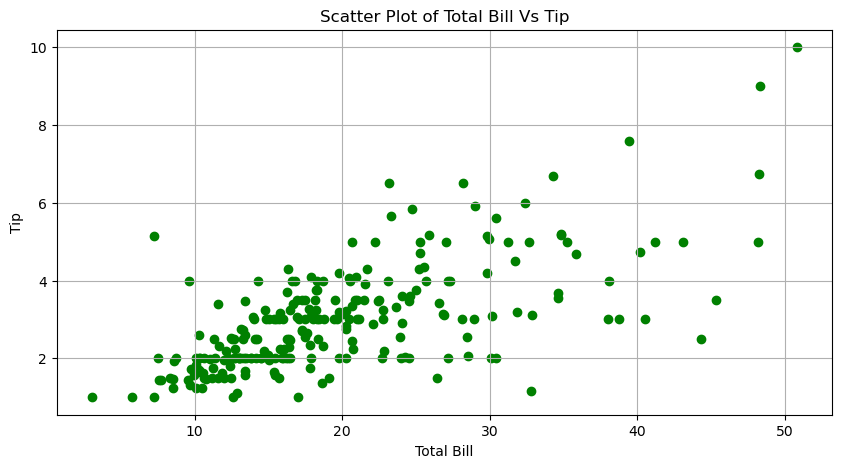

In [426]:
plt.figure(figsize=(10,5))
plt.scatter(Transformed_data['total_bill'],Transformed_data['tip'],color='green',marker='o')
plt.title('Scatter Plot of Total Bill Vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.show()

 The plot effectively shows that higher total bills are generally associated with higher tips, indicating a trend where tipping behavior is   linked to the size of the bill.
 
 The presence of outliers suggests that there might be specific instances where tipping behavior deviates from the trend.

### Remove Outliers

In [427]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) .quantile() method to find the 25th and 75th percentiles.
Q1 = Transformed_data['tip'].quantile(0.25)
Q3 = Transformed_data['tip'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds 
# Set lower and upper bounds for outliers.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = Transformed_data[(Transformed_data['tip'] >= lower_bound) & (Transformed_data['tip'] <= upper_bound)]
df_filtered

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,3,False,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


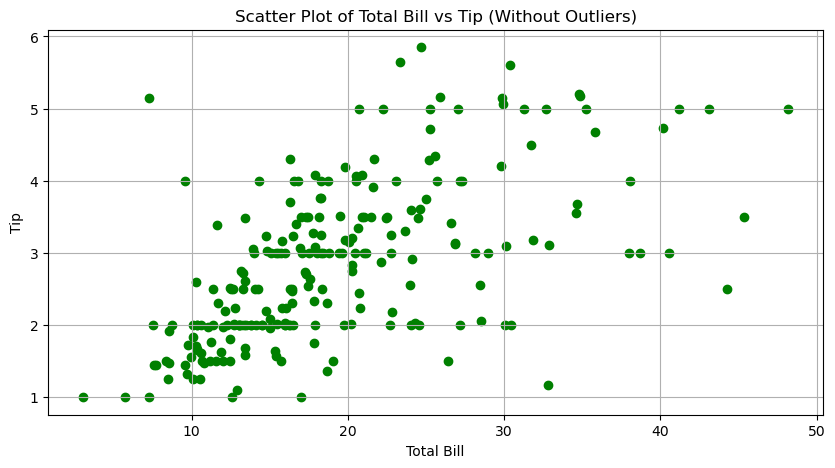

In [428]:
# Create scatter plot after removing outliers
plt.figure(figsize=(10,5))
plt.scatter(df_filtered['total_bill'], df_filtered['tip'], color='green', marker='o')
plt.title('Scatter Plot of Total Bill vs Tip (Without Outliers)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.show()


In the scatter plot, the points are close together and form a clear pattern. There are no points that are very far away from the rest. This shows that we have remov the outliers). Now, the data gives a better idea of how people usually tip based on their total bill.

## Model Building:

In [429]:
# Split data
x = df_filtered.drop('total_bill',axis=1)
y = df_filtered['total_bill']

In [470]:
# Split into train_test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [471]:
len(df_filtered)

235

In [472]:
# check the shape of the data
print('shape of x_train',x_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',x_test.shape)
print('shape of y_test',y_test.shape)

shape of x_train (188, 8)
shape of y_train (188,)
shape of x_test (47, 8)
shape of y_test (47,)


## Train the model

In [473]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
print('Training Completed')

Training Completed


## Accuracy Score

In [474]:
print('Test score')
model_lr.score(x_test,y_test)

Test score


0.5086815693442432

In [475]:
print('Train score')
model_lr.score(x_train,y_train)

Train score


0.4994486263074852

In [476]:
model_lr.predict(x_test)# all the predicted values

array([22.48645161, 20.3252188 ,  9.81748006, 30.4537922 , 17.22408026,
       13.99460082, 20.39164168, 22.6674277 , 12.79954336, 32.94775527,
       31.1431458 , 23.96051417, 14.82842801, 16.14808088, 17.24224716,
       14.42321126, 14.32011717, 17.35400029, 16.29483105, 29.0479318 ,
       24.49359257, 17.74518238, 14.55097938, 19.61725269, 12.43277576,
       21.21210482, 17.95857824, 17.14872452, 25.90971797, 19.08992035,
       13.17747209, 28.80756546, 35.81491297, 14.22368135, 14.8259482 ,
       16.14808088, 16.14336886, 21.89584743, 20.68384913, 12.08417507,
       23.96914904, 17.18604218, 23.53713051, 20.39164168, 20.39164168,
       20.91788406, 25.36681808])

In [477]:
y_pred = model_lr.predict(x_test)

## Evaluate the model

In [478]:
print('R-2', metrics.r2_score(y_test,y_pred))
print('Mean-Squared-Error', metrics.mean_squared_error(y_test,y_pred))

R-2 0.5086815693442432
Mean-Squared-Error 41.34076307544373


* These metrics collectively give insight into the performance and accuracy of our linear regression model, with lower value of MSE,and higher values of R-squared indicating a better fit of the model to the data.

## Comparing Actual vs Predicted:

In [479]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
230,24.01,22.486452
104,20.92,20.325219
222,8.58,9.817480
197,43.11,30.453792
140,17.47,17.224080
237,32.83,13.994601
153,24.55,20.391642
109,14.31,22.667428
149,7.51,12.799543
95,40.17,32.947755


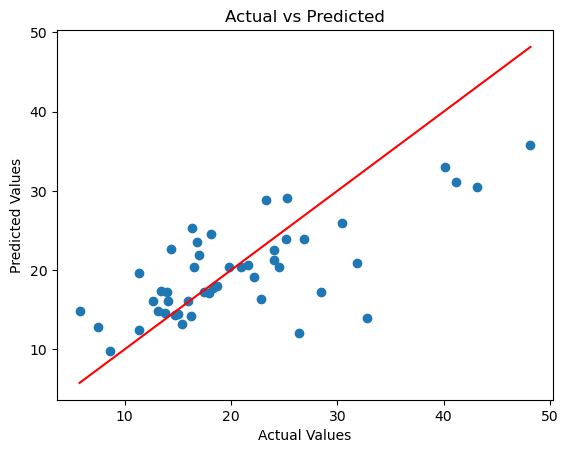

In [480]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


* Blue Dots: Each dot represents an individual prediction, with the x-axis showing the actual value and the y-axis showing the predicted value.
* Red Line: The red line is a reference line where the predicted values would perfectly match the actual values (i.e., a perfect prediction would lie on this line).
* The model is making decent predictions,